## Stroke Prediction

Aim : 
* Our objective is to understand what are the reasons that cause stroke to peoeple and see if we can succefully detect stroke on some features using ML technics 

#### 1 | Importing Libraries and Loading dataset

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [46]:
df = pd.read_csv(r"E:\Python basics\Pranjal Sir\0. CP - 1\healthcare-dataset-stroke-data.csv")

In [47]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [48]:
df.shape

(5110, 12)

In [49]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### 2 | About the dataset

Attribute Information
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"
12) stroke: 1 if the patient had a stroke or 0 if not *Note: "Unknown" in smoking_status means that the information is unavailable for this patient

#### 3 | Checking For Null Values


In [51]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

**Group the age into toddler, teen, adult and senior**

In [52]:
age_group=[]
for i in df['age']:
    if i<2.0:
        age_group.append('Toddler')
    elif i>2.0 and i<=19.0:
        age_group.append('Teen')
    elif i>19.0 and i<60.0:
        age_group.append('Adult')
    else:
        age_group.append('Senior')
df['age_group']=age_group
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Senior
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Senior
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Senior
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Adult
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Senior


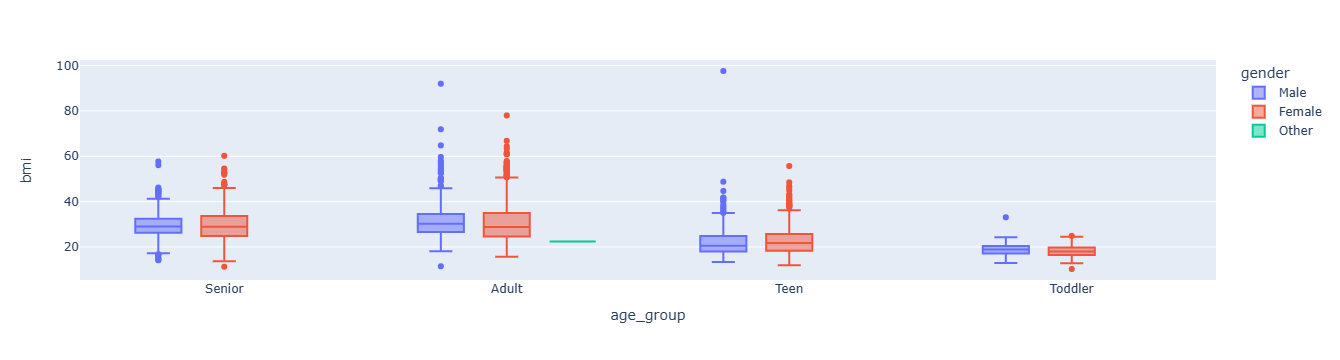

In [53]:
fig = px.box(df, x="age_group", y="bmi",color="gender")
fig.show()   # plotly express

**By Using the BMI median of all categories fill the null values**

In [54]:
def imput_bmi(cols):
    bmi = cols[0]
    age_group = cols[1]
    gender = cols[2]
    if pd.isnull(bmi):
        if age_group == 'Senior':
            if gender == 'Male':
                return 29.0
            else:
                return 28.9
        elif age_group == 'Adult':
            if gender == 'Male':
                return 30.2
            else:
                return 28.8
        elif age_group == 'Teen':
            if gender == 'Male':
                return 20.6
            else:
                return 21.8
        else:
            if gender == 'Male':
                return 18.9
            else:
                return 18.05
    else:
        return bmi
    
df['bmi']=df[['bmi','age_group','gender']].apply(imput_bmi,axis=1)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Senior
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1,Senior
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Senior
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Adult
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Senior


#### 4 | EDA

**storing categorical and continuous columns into separate lists for future purpose**

In [55]:
con_cols=['age','avg_glucose_level','bmi']
cat_cols=[]
for i in df.columns:
    if i!='id' and i!='stroke' and i not in con_cols:
        cat_cols.append(i)
cat_cols

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'age_group']

In [56]:
for i in cat_cols:
    print(f'============Values in {i}============\n{df[i].value_counts()}')

============Values in gender============
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
============Values in hypertension============
0    4612
1     498
Name: hypertension, dtype: int64
============Values in heart_disease============
0    4834
1     276
Name: heart_disease, dtype: int64
============Values in ever_married============
Yes    3353
No     1757
Name: ever_married, dtype: int64
============Values in work_type============
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
============Values in Residence_type============
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
============Values in smoking_status============
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64
============Values in age_group============
Adult      2768
Senior     1431
Teen        791
Toddler     1

In [57]:
df[df.gender == 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0,Adult


In [58]:
df.drop(index = df[df['gender']=='Other'].index[0] ,axis=0,inplace=True)

In [59]:
df.stroke.value_counts()

0    4860
1     249
Name: stroke, dtype: int64

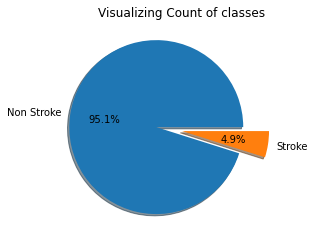

In [60]:
plt.title("Visualizing Count of classes")
plt.pie(np.array(df['stroke'].value_counts()),labels=['Non Stroke','Stroke'],explode=[0.3,0],autopct='%1.1f%%',shadow=True)
plt.show()

### A huge imbalance of the classes is found! 
#### Would oversample the minority class.

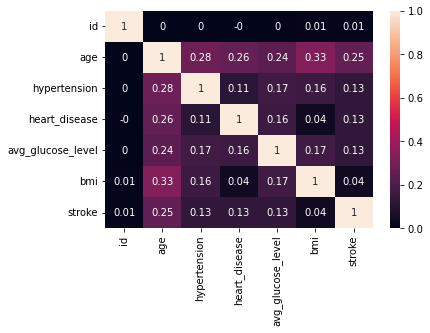

In [61]:
sns.heatmap(df.corr().round(2),annot=True);

#### Visualizing Count of Categorical Columns

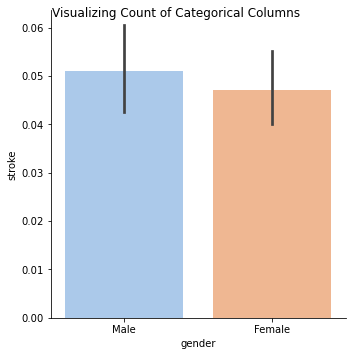

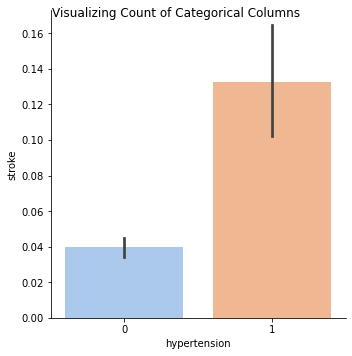

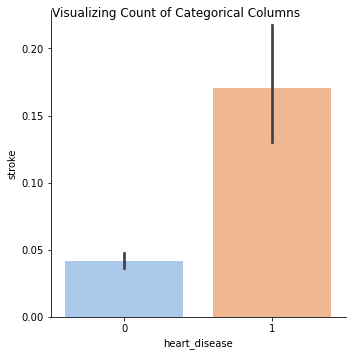

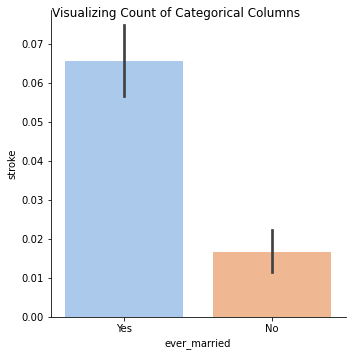

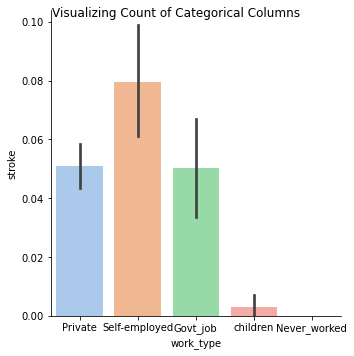

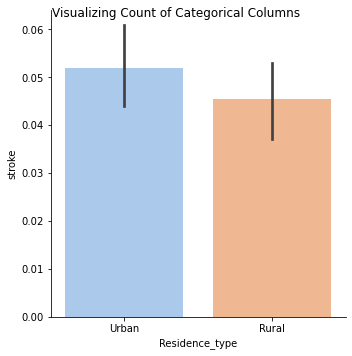

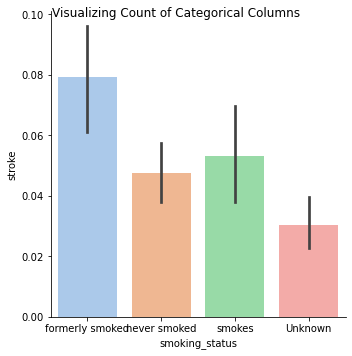

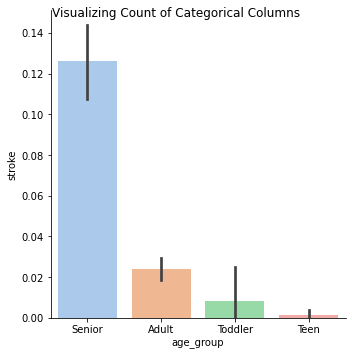

In [66]:
for i in cat_cols:
    sns.catplot(x=i, y="stroke", palette="pastel", kind="bar", data=df)

    plt.suptitle("Visualizing Count of Categorical Columns")    
    plt.show()

In [19]:
len_data = len(df)
len_w = len(df[df["gender"]=="Male"])
len_m = len_data - len_w

men_stroke = len(df.loc[(df["stroke"]==1)&(df['gender']=="Male")])
men_no_stroke = len_m - men_stroke

women_stroke = len(df.loc[(df["stroke"]==1) & (df['gender']=="Female")])
women_no_stroke = len_w - women_stroke

labels = ['Men with stroke','Healthy Men','Women with stroke','Healthy Women']
values = [men_stroke, men_no_stroke, women_stroke, women_no_stroke]


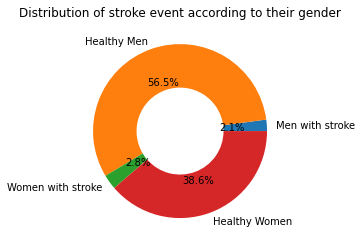

In [20]:
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.1f%%', wedgeprops=dict(width=.5))
ax.set_title("Distribution of stroke event according to their gender")
plt.show()

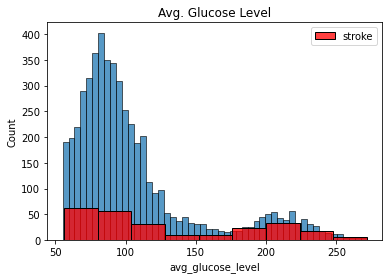

In [41]:
sns.histplot(df.avg_glucose_level);
sns.histplot(df[df['stroke']==1]['avg_glucose_level'], color='red',label='stroke')
plt.title('Avg. Glucose Level');
plt.legend();

From graph, it shows that the density of people having glucose level less than 50 suffered stroke more.

C:\Users\Krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



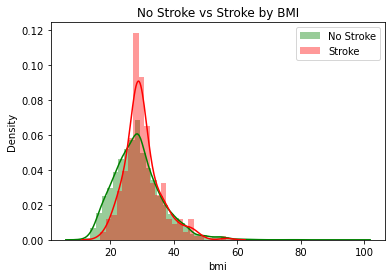

In [22]:
sns.distplot(df[df['stroke'] == 0]["bmi"],color='green',label='No Stroke');   
sns.distplot(df[df['stroke'] == 1]["bmi"],color='red', label='Stroke');     
plt.title('No Stroke vs Stroke by BMI');
plt.legend();

From the graph, it shows that the density of overweight people who suffered a stroke is more.

C:\Users\Krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



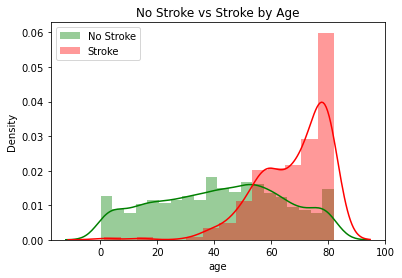

In [23]:
sns.distplot(df[df['stroke'] == 0]["age"], color='green',label='No Stroke'); 
sns.distplot(df[df['stroke'] == 1]["age"], color='red',label='Stroke');
plt.title('No Stroke vs Stroke by Age');
plt.legend();

From graph, it can be seen that the density of people having age above 50 suffered stroke more.

#### 5 | Data Preprocessing

In [24]:
# Encoding of Categorical columns

cat_cols.pop()   # age_group 

df_enc=pd.get_dummies(df[cat_cols],drop_first=True)
df_enc.head() 

,hypertension,heart_disease,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1,1,1,0,1,0,0,1,1,0,0
1,0,0,0,1,0,0,1,0,0,0,1,0
2,0,1,1,1,0,1,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,1,0,0,1
4,1,0,0,1,0,0,1,0,0,0,1,0


In [25]:
df[df_enc.columns]=df_enc
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,...,1,1,0,1,0,0,1,1,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,...,0,1,0,0,1,0,0,0,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,...,1,1,0,1,0,0,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,...,0,1,0,1,0,0,1,0,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,...,0,1,0,0,1,0,0,0,1,0


In [26]:
df.drop(cat_cols,axis=1,inplace=True)
df.head()

,id,age,avg_glucose_level,bmi,stroke,age_group,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,228.69,36.6,1,Senior,1,1,0,1,0,0,1,1,0,0
1,51676,61.0,202.21,28.9,1,Senior,0,1,0,0,1,0,0,0,1,0
2,31112,80.0,105.92,32.5,1,Senior,1,1,0,1,0,0,0,0,1,0
3,60182,49.0,171.23,34.4,1,Adult,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,174.12,24.0,1,Senior,0,1,0,0,1,0,0,0,1,0


In [27]:
df_final = df.drop(['id','age_group'],axis=1)
df_final.head()

,age,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,228.69,36.6,1,1,1,0,1,0,0,1,1,0,0
1,61.0,202.21,28.9,1,0,1,0,0,1,0,0,0,1,0
2,80.0,105.92,32.5,1,1,1,0,1,0,0,0,0,1,0
3,49.0,171.23,34.4,1,0,1,0,1,0,0,1,0,0,1
4,79.0,174.12,24.0,1,0,1,0,0,1,0,0,0,1,0


#### Splitting and Over Sampling 

In [28]:
df.stroke.value_counts()

0    4860
1     249
Name: stroke, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_final , test_size=.2)
x_train = train.drop('stroke', axis=1)
y_train = train['stroke']
x_test  = test.drop('stroke', axis=1)
y_test  = test['stroke']

In [30]:
df1 = train[train.stroke == 1]
train1 = pd.concat([train , df1, df1, df1, df1, df1, df1, df1, df1,
                   df1, df1, df1, df1, df1, df1, df1, df1, df1, df1])

x_train = train1.drop('stroke', axis=1)
y_train = train1['stroke']        

In [31]:
train1.stroke.value_counts()

0    3894
1    3667
Name: stroke, dtype: int64

In [32]:
x_train.shape

(7561, 13)

In [33]:
x_test.shape

(1022, 13)

In [34]:
# Scaling

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train[con_cols]=scaler.fit_transform(x_train[con_cols])
x_test[con_cols]=scaler.transform(x_test[con_cols])
x_train.head()

,age,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1606,-0.153883,-0.226406,1.718680,1,0,0,1,0,0,0,0,0,1
1366,-2.366149,-0.592737,-1.426402,1,0,0,0,0,1,1,0,0,0
650,-0.020935,-0.479160,-1.061348,0,1,0,0,1,0,1,0,1,0
93,1.131287,-0.908768,-0.485686,0,1,0,0,1,0,1,0,0,0
4603,-1.040208,-0.686663,-0.050429,0,0,0,0,0,0,1,1,0,0


#### 6 | Model Building

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.model_selection import cross_val_score

In [36]:
model_names = []
cm   = []
val  = []
acc  = []
pre  = []
rec  = []
f1   = []
roc  = []

logreg = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
svc = SVC()
ada = AdaBoostClassifier(base_estimator=rf)

models = [logreg, dt,rf,knn,svc,ada]

for model in models:
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    cm.append(confusion_matrix(y_test, pred))
    accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
    validation = round(accuracies.mean()*100,2)
    val.append(validation)
    acc.append(accuracy_score(y_test, pred))
    pre.append(precision_score(y_test, pred))
    rec.append(recall_score(y_test, pred))
    f1.append(f1_score(y_test, pred)) 
    roc.append(roc_auc_score(y_test, pred))
    
model_names = ['logreg', 'dt','rf','knn','svc','ada']
result = pd.DataFrame({'cm':cm,'Accuracy':acc,'Validation':val,'precision':pre,
                       'recall':rec,'f1':f1,'roc':roc}, index=model_names)
result

,cm,Accuracy,Validation,precision,recall,f1,roc
logreg,"[[722, 244], [11, 45]]",0.750489,76.70,0.155709,0.803571,0.260870,0.775492
dt,"[[925, 41], [48, 8]]",0.912916,97.61,0.163265,0.142857,0.152381,0.550207
rf,"[[959, 7], [54, 2]]",0.940313,99.17,0.222222,0.035714,0.061538,0.514234
knn,"[[857, 109], [39, 17]]",0.855186,93.51,0.134921,0.303571,0.186813,0.595367
svc,"[[743, 223], [21, 35]]",0.761252,83.88,0.135659,0.625000,0.222930,0.697076
ada,"[[957, 9], [54, 2]]",0.938356,99.25,0.181818,0.035714,0.059701,0.513199


#### Tuning the Models

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]), 
               (KNeighborsClassifier(),[{'n_neighbors':[5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]), 
               (SVC(),[{'C':[0.25,0.5,0.75,1],'kernel':['linear', 'rbf'],'random_state':[0]}]), 
               (AdaBoostClassifier(RandomForestClassifier()), [{'n_estimators': [100, 150, 200], 'random_state': [0]}])
               ]

In [39]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(x_train, y_train)
   
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
   
    print('{}:'.format(i))
    print('Best Accuracy: {:.2f}%'.format(best_accuracy * 100))
    print('Best Parameters : ',best_param)
    print('----------------')


LogisticRegression():
Best Accuracy: 76.79%
Best Parameters :  {'C': 0.25, 'random_state': 0}
----------------
DecisionTreeClassifier():
Best Accuracy: 97.57%
Best Parameters :  {'criterion': 'gini', 'random_state': 0}
----------------
RandomForestClassifier():
Best Accuracy: 99.19%
Best Parameters :  {'criterion': 'gini', 'n_estimators': 150, 'random_state': 0}
----------------
KNeighborsClassifier():
Best Accuracy: 93.51%
Best Parameters :  {'metric': 'euclidean', 'n_neighbors': 5}
----------------
SVC():
Best Accuracy: 83.88%
Best Parameters :  {'C': 1, 'kernel': 'rbf', 'random_state': 0}
----------------
AdaBoostClassifier(base_estimator=RandomForestClassifier()):
Best Accuracy: 99.14%
Best Parameters :  {'n_estimators': 100, 'random_state': 0}
----------------


**Looking at output after GridSearch , we can determine that the RandomForest seems best fit for the model.**

### Model after Tuning Hyperparameters 
We only see RandomForest performance as it have high accuracy.

### RandomForest 

In [40]:
rf = RandomForestClassifier(criterion= 'gini', n_estimators= 150, random_state= 0)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)

print('Confusion Matrix:\n ', confusion_matrix(y_test, pred))
print('Accuracy Score: ',accuracy_score(y_test, pred)*100)

Confusion Matrix:
  [[955  11]
 [ 54   2]]
Accuracy Score:  93.63992172211351


In [67]:
ada = AdaBoostClassifier(base_estimator=RandomForestClassifier(),n_estimators= 100, random_state= 0)
ada.fit(x_train, y_train)
pred = ada.predict(x_test)

print('Confusion Matrix:\n ', confusion_matrix(y_test, pred))
print('Accuracy Score: ',accuracy_score(y_test, pred)*100)

Confusion Matrix:
  [[956  10]
 [ 53   3]]
Accuracy Score:  93.83561643835617


## Conclusion

Therefore, after the multiple visualizations of our and going through all the performance of the models. I tune the hyperparameters with the help of GridSearch to get models. After that, I came to conclusion that RandomForestClassifier is best model for this dataset.